<font size="5"><center>Cartas de Control e Índices  de Capacidad<center><font>
<font size="4"><center>Tarea 2<center>
    Iván Vega Gutiérrez
<center>Ingeniería de la Calidad<center>

A continuación se muestran las funciones necesarias para poder realizar los ejercicios de la tarea.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [5]:
def get_constantes(carta, n):
    if carta == 'X-R':
        # Calculamos d2 y d3
        M = np.random.normal(size=(100000,n))
        R = []
        for i in range(len(M)):
            R.append(np.max(M[i]) - np.min(M[i]))       
        d2 = np.mean(R)
        d3 = np.std(R)
        # Calculamos las constantes
        A2 = 3/(d2*(n)**(0.5))
        D3 = 1 - 3*(d3/d2)
        if D3 < 0:
            D3 = 0
        D4 = 1 + 3*(d3/d2)
        #print('A2={}, D3={}, D4={}'.format(A2,D3,D4))
        return (A2, D3, D4)
    elif carta == 'X-S':
        # Calculamos c4
        c4 = (((2/(n - 1))**0.5) * (1/math.gamma((n-1)/2))*math.gamma(n/2))
        # Calculamos las constantes
        A3 = 3/(c4*(n)**0.5)
        B3 = 1 - (3/c4)*(1-c4**2)**0.5
        if B3 < 0:
            B3 = 0
        B4 = 1 + (3/c4)*(1-c4**2)**0.5
        #print('A3={}, B3={}, B4={}'.format(A3, B3, B4))
        return(A3, B3, B4)

def get_lc(data, carta):
    long, n = data.shape
    if carta == 'X-R':
        media = []
        rango = []
        for i in range(long):
            muestra = data.iloc[i,:]
            media.append(np.mean(muestra))
            rango.append(np.max(muestra) - np.min(muestra)) 
        x_bar = sum(media)/long
        r_bar = sum(rango)/long
        A2 = get_constantes('X-R', n)[0]
        LSC = x_bar + A2*r_bar
        LC = x_bar
        LIC = x_bar - A2*r_bar
        sigma = (A2*r_bar)/3
        return LSC, LC, LIC , media, sigma
    
    elif carta == 'R':
        rango = []
        for i in range(long):
            muestra = data.iloc[i,:]
            rango.append(np.max(muestra) - np.min(muestra)) 
        r_bar = sum(rango)/long 
        D3 = get_constantes('X-R', n)[1]
        D4 = get_constantes('X-R', n)[2]
        LSC = D4*r_bar
        LC = r_bar
        LIC = D3*r_bar
        return LSC, LC, LIC, rango
    
    elif carta == 'X-S':
        media = []
        S = []
        for i in range(long):
            muestra = data.iloc[i,:]
            media.append(np.mean(muestra))
            S.append(np.std(muestra))
        x_bar = sum(media)/long
        s_bar = sum(S)/long
        A3 = get_constantes('X-S', n)[0]
        LSC = x_bar + A3*s_bar
        LC = x_bar
        LIC = x_bar - A3*s_bar
        sigma = (A3*s_bar)/3
        return LSC, LC, LIC, media, sigma
    
    elif carta == 'S':
        S = []
        for i in range(long):
            muestra = data.iloc[i,:]
            S.append(np.std(muestra))
        s_bar = sum(S)/long
        B3 = get_constantes('X-S', n)[1]
        B4 = get_constantes('X-S', n)[2]
        LSC = B4*s_bar
        LC = s_bar
        LIC = B3*s_bar
        return LSC, LC, LIC, S
    
    elif carta == 'I':
        rm = []
        for i in range(long-1):
            rm_i = abs(data.iloc[i+1] - data.iloc[i])
            rm.append(rm_i)
        rm_bar = np.mean(rm)
        x_bar = np.mean(data)
        LSC = x_bar + 2.659*rm_bar
        LC = x_bar
        LIC = x_bar - 2.659*rm_bar
        sigma = (2.659*rm_bar)/3
        return LSC, LC, LIC ,data, sigma, rm
    
    elif carta == 'RM':
        rm = []
        for i in range(long-1):
            rm_i = abs(data.iloc[i+1] - data.iloc[i])
            rm.append(rm_i)
        rm_bar = np.mean(rm)
        LSC = 3.268*rm_bar
        LC = rm_bar
        LIC = 0
        return LSC, LC, LIC ,rm

def grafica_carta(limites, carta):
    LSC = limites[0]
    LC = limites[1]
    LIC = limites[2]
    datos = limites[3]
    obs = np.arange(1,len(datos)+1)
    num_obs = len(obs)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(obs, datos, marker='o')
    ax.plot([1,num_obs],[LC,LC], color = 'green')
    ax.plot([1,num_obs],[LSC,LSC], color = 'red', linestyle = 'dashed')
    ax.plot([1,num_obs],[LIC,LIC], color = 'red', linestyle = 'dashed')
    plt.text(num_obs,LSC, 'LSC = {}'.format(round(float(LSC),2)))
    plt.text(num_obs,LC, 'LC = {}'.format(round(float(LC),2)))
    plt.text(num_obs,LIC, 'LIC = {}'.format(round(float(LIC),2)))
    plt.title('Carta de control : ' + carta)
    plt.xlabel('Muestra')
    
def grafica_carta_esp(limites, carta, lim_esp):
    LSC = limites[0]
    LC = limites[1]
    LIC = limites[2]
    datos = limites[3]
    obs = np.arange(1,len(datos)+1)
    num_obs = len(obs)
    LES = lim_esp[0]
    LEI = lim_esp[1]
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(obs, datos, marker='o')
    ax.plot([1,num_obs],[LC,LC], color = 'green')
    ax.plot([1,num_obs],[LSC,LSC], color = 'red', linestyle = 'dashed')
    ax.plot([1,num_obs],[LIC,LIC], color = 'red', linestyle = 'dashed')
    plt.text(num_obs,LSC, 'LSC = {}'.format(round(float(LSC),2)))
    plt.text(num_obs,LC, 'LC = {}'.format(round(float(LC),2)))
    plt.text(num_obs,LIC, 'LIC = {}'.format(round(float(LIC),2)))
    plt.text(num_obs,LES, 'LES = {}'.format(LES))
    plt.text(num_obs,LEI, 'LEI = {}'.format(LEI))
    plt.title('Carta de control : ' + carta)
    plt.xlabel('Muestra')
    ax.plot([1,num_obs],[LES,LES], color = 'black', linestyle = 'dashed')
    ax.plot([1,num_obs],[LEI,LEI], color = 'black', linestyle = 'dashed')

In [4]:
cp = get_cp(558, 542, 2.01)
cps = get_cps(558, 2.01, 552.53)
cps

NameError: name 'get_cp' is not defined

In [6]:
def get_cp(LES, LEI, sigma):
    cp = (LES - LEI)/(6*sigma)
    #print(LES-LEI)
    #print(6*sigma)
    return cp

def get_cps(LES, sigma, mu):
    cps = (LES - mu)/(3*sigma)
    return cps

def get_cpi(LEI, sigma, mu):
    cpi = (mu - LEI)/(3*sigma)
    return cpi

def get_cpk(cps, cpi):
    cpk = min(cps, cpi)
    return cpk

def get_obs_cp(cp):
    if cp > 2:
        return 'Clase mundial : Calidad Seis Sigma'
    elif 1.3 < cp <= 2:
        return 'Tipo de proceso 1 : Más que adecuado'
    elif 1 < cp <= 1.33:
        return 'Tipo de proceso 2 : Adecuado, pero requiere de un control estricto'
    elif 0.67 < cp <= 1:
        return 'Tipo de proceso 3 : No adecuado, requiere modificaciones '
    else:
        return 'Tipo de proceso 4 : No adecuado, requiere modificaciones serias'

def get_obs_cpk(cpk):
    if 1 <= cpk:
        return 'El proceso está fabricando artículos que cumplen con las especificaciones.'
    elif 0 < cpk < 1:
        return 'El proceso está produciendo artículos fuera de las especificaciones.'
    else:
        return 'La media del proceso está fuera de las especificaciones.'

def get_indices_capacidad(lim_esp, mu, sigma):
    LES = lim_esp[0]
    LEI = lim_esp[1]
    cp = get_cp(LES, LEI, sigma)
    cps = get_cps(LES, sigma, mu)
    cpi = get_cpi(LEI, sigma, mu)
    cpk = get_cpk(cps, cpi)
    df = pd.DataFrame()
    df['Indice'] = ['Cp', 'Cps', 'Cpi', 'Cpk']
    df['Valor'] = [cp, cps, cpi, cpk]
    print(df)
    print()
    print('--------Observaciones--------')
    print(get_obs_cp(cp))
    print(get_obs_cpk(cpk))
    
def get_hist(datos, lim_esp):
    LES = lim_esp[0]
    LEI = lim_esp[1]
    sns.histplot(data = datos, kde = True)
    plt.axvline(x = LES, color='r', linestyle='--')
    plt.axvline(x = LEI, color='r', linestyle='--')
    plt.text(LES,1, 'LES')
    plt.text(LEI,1, 'LEI')
    plt.show()

# Ejercicio 1

Un ingeniero de procesos está a cargo de la producción de un modelo de llantas para automóvil,
cuya longitud de la capa debe ser de 550 mm, con una tolerancia 8 mm. La longitud de la
capa es el resultado de un proceso de corte de una tira de hule la cual debe garantizar que
la longitud esté entre la especificación inferior LEI = 542mm y la superior LES = 558, con
un valor ideal nominal µ = 550. Para detectar la posible presencia de causa especiales de
variación y, en general para monitorear el correcto funcionamiento del proceso de corte, cada
hora se toman cinco capas y se miden los datos obtenidos en los últimos 4 dı́as. Los resultados
obtenidos se muestran en la hoja de cálculo llamada ’LLANTA’ del archivo anexo. Obtener
las cartas de control correspondientes y los ı́ndices de capaciadad. Interpretar.

**Solución**

Primero, hallemos las cartas de control para el ejercicio.

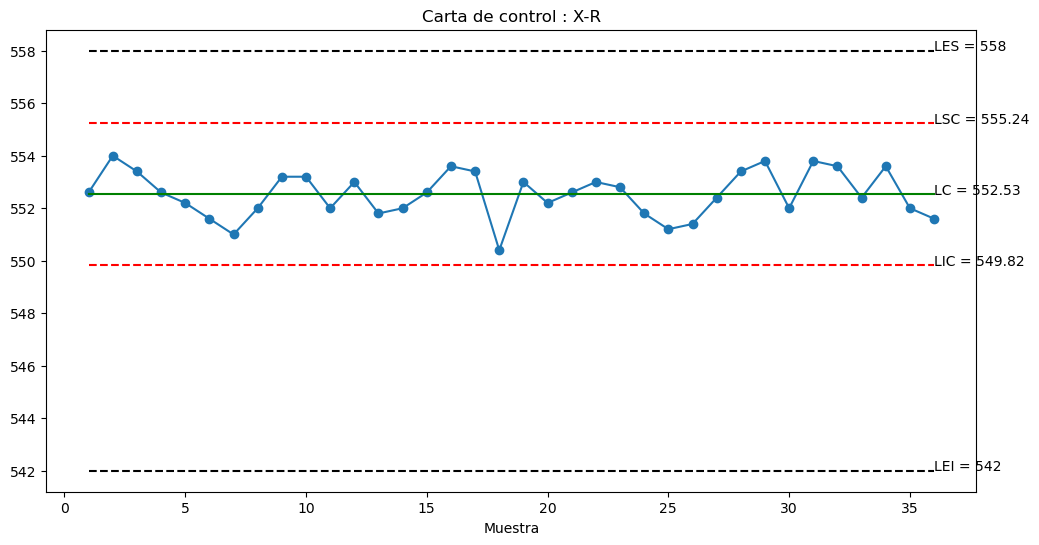

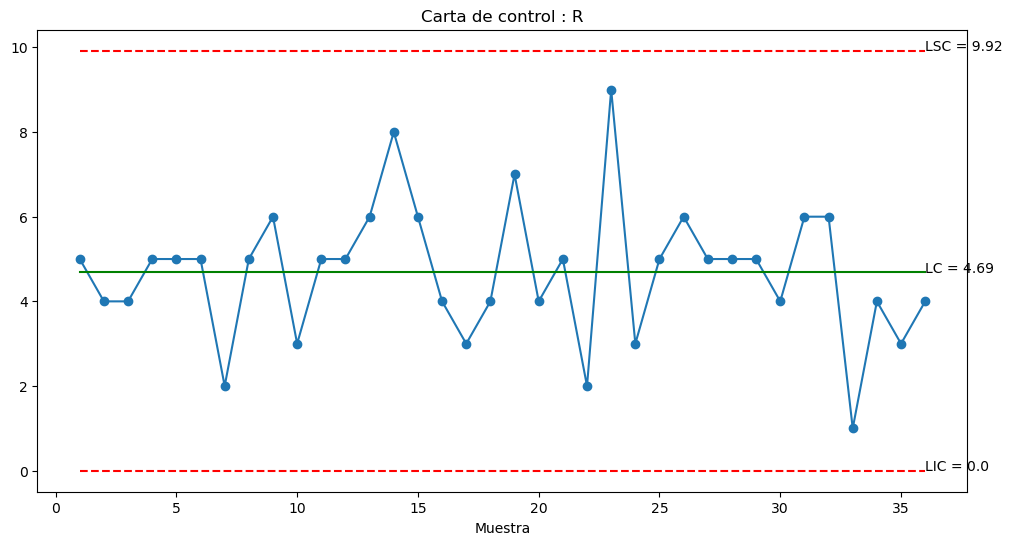

In [13]:
data_1 = pd.read_excel('/home/vega/Escritorio/ing_calidad/tarea2/Data_cp.xlsx', sheet_name = 'LLANTA')
limites1 = get_lc(data_1.iloc[:,1:], 'X-R')
lim_esp = [558, 542]
limites1_r = get_lc(data_1.iloc[:,1:], 'R')
grafica_carta_esp(limites1, 'X-R', lim_esp)
grafica_carta(limites1_r, 'R')

A partir de las cartas de control, se puede observar que el proceso está bajo control y que además cumple con los límites de especificación. Ahora veamos los ínidces de capacidad del proceso, para ello grafiquemos un  histograma de los datos para tener una mejor visualización sobre el comportamiento del proceso con respecto de los límites de especificación.

In [14]:
l = limites1[3]
l

[552.6,
 554.0,
 553.4,
 552.6,
 552.2,
 551.6,
 551.0,
 552.0,
 553.2,
 553.2,
 552.0,
 553.0,
 551.8,
 552.0,
 552.6,
 553.6,
 553.4,
 550.4,
 553.0,
 552.2,
 552.6,
 553.0,
 552.8,
 551.8,
 551.2,
 551.4,
 552.4,
 553.4,
 553.8,
 552.0,
 553.8,
 553.6,
 552.4,
 553.6,
 552.0,
 551.6]

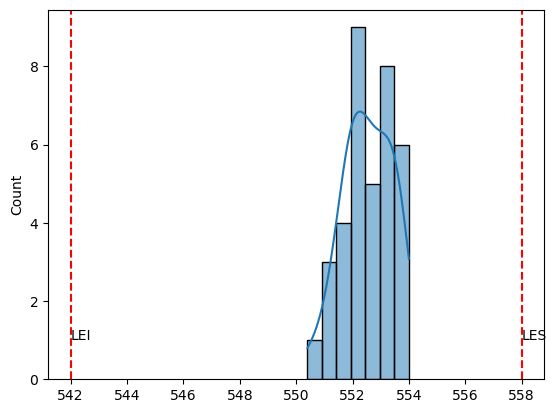

  Indice     Valor
0     Cp  2.953598
1    Cps  2.018292
2    Cpi  3.888905
3    Cpk  2.018292

--------Observaciones--------
Clase mundial : Calidad Seis Sigma
El proceso está fabricando artículos que cumplen con las especificaciones.


0.9028534781803131

In [15]:

#datos1 = np.array(data_1.iloc[:,1:]).flatten()
mu = limites1[1]
datos1 = limites1[3]
sigma = limites1[4]
get_hist(datos1, lim_esp)
#mu = np.mean(datos1)
#sigma = np.std(datos1)
indices = get_indices_capacidad(lim_esp, mu, sigma)
indices
sigma

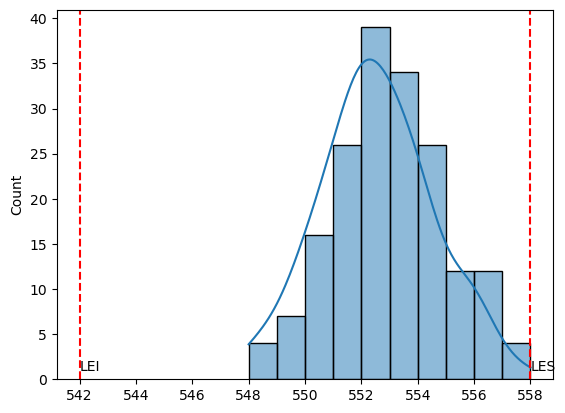

  Indice     Valor
0     Cp  1.338174
1    Cps  0.914419
2    Cpi  1.761930
3    Cpk  0.914419

--------Observaciones--------
Tipo de proceso 1 : Más que adecuado
El proceso está produciendo artículos fuera de las especificaciones.


1.9927646903513498

In [11]:
datos1 = np.array(data_1.iloc[:,1:]).flatten()
#mu = limites1[1]
#datos1 = limites1[3]
#sigma = limites1[4]
get_hist(datos1, lim_esp)
mu = np.mean(datos1)
sigma = np.std(datos1)
indices = get_indices_capacidad(lim_esp, mu, sigma)
indices
sigma

 Del histograma se puede observar que los datos siguen una  distribución normal. A pesar que el indice de capacidad es muy bueno, el índice de capacidad real es menor que uno, esto se puede ver claramente desde la carta de control y en el histograma, ya que la media no está centrada, se corre riesgo de obtener muestras por encima del límite de especificación de 558 . Por lo tanto se tiene un proceso capaz pero descentrado.

# Ejercicio 2

La distancia entre dos ranuras de una llave automotriz es una caracterı́stica crı́tica de calidad.
Los lı́mites de especificación fijados son 9.85 y 10.15. Los datos se muestran en la hoja de
cálculo llamada ’RANURA’ del archivo anexo. Obtener las cartas de control correspondientes
y los ı́ndices de capaciadad. Interpretar.

**Solución**

Hallemos las cartas de control.

In [10]:
data_2.shape

(100, 1)

/home/vega/anaconda3/envs/control/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


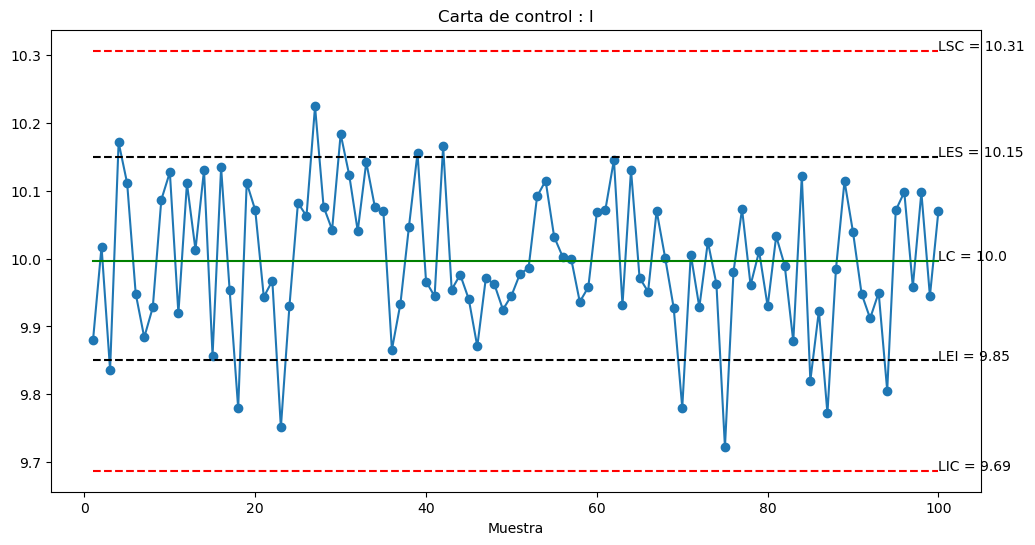

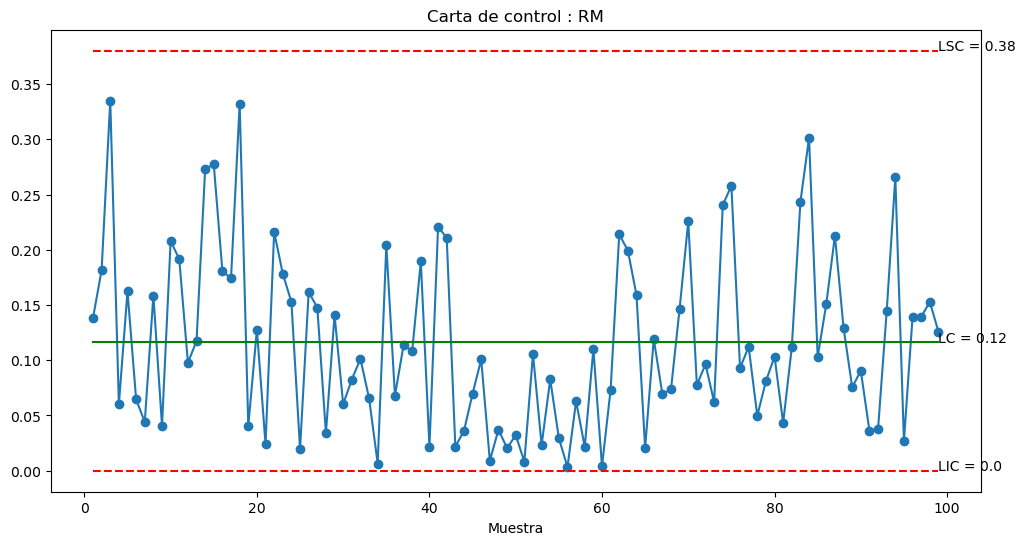

In [7]:
data_2 = pd.read_excel('Data_cp.xlsx', sheet_name = 'RANURA')
limites2 = get_lc(data_2, 'I')
limites2_rm = get_lc(data_2, 'RM')
lim_esp = [10.15, 9.85]
grafica_carta_esp(limites2, 'I', lim_esp)
grafica_carta(limites2_rm, 'RM')

De las cartas de control se observa que se está cumpliendo con los límites de control, sin embargo, no se está cumpliendo con los límites de especificación, hay elementos que rebasan los límites de especificación superior e inferior. A pesar que el proceso no cumple con los límites de especificación, se obserta que la variabilidad está en conrol.

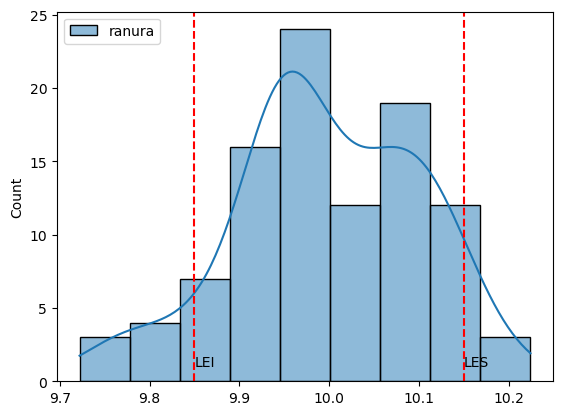

  Indice     Valor
0     Cp  0.484168
1    Cps  0.494212
2    Cpi  0.474124
3    Cpk  0.474124

--------Observaciones--------
Tipo de proceso 4 : No adecuado, requiere modificaciones serias
El proceso está produciendo artículos fuera de las especificaciones.


In [16]:
get_hist(data_2,lim_esp)
datos2 = np.array(data_2)
mu = np.mean(datos2)
sigma = np.std(datos2)
get_indices_capacidad(lim_esp, mu, sigma)

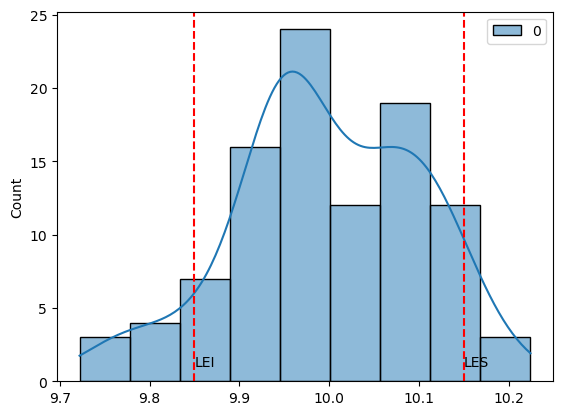

  Indice     Valor
0     Cp  0.484844
1    Cps  0.494901
2    Cpi  0.474786
3    Cpk  0.474786

--------Observaciones--------
Tipo de proceso 4 : No adecuado, requiere modificaciones serias
El proceso está produciendo artículos fuera de las especificaciones.


In [29]:
mu = float(limites2[1])
datos2 = np.array(data_2)
#datos2 = np.array(limites2[5])
sigma = float(limites2[4])
get_hist(datos2, lim_esp)
#mu = np.mean(datos1)
#sigma = np.std(datos1)
indices = get_indices_capacidad(lim_esp, mu, sigma)
indices

Por otro lado, se observa que el inidice de capacidad es muy bajo. A pesar que el proceso se encuentra centrado, el proceso es estable pero incapaz. Por lo quese requiere hacer varias modificaciones en el proceso.

# Ejercicio 3

Se cuentan con 90 observaciones de tensión de piezas plásticas utilizadas en procesos de
formación de piezas metálicas. Los lı́mites de especificación son 5 y 10. Los datos se muestran
en la hoja de cálculo llamada ’PLASTICO’ del archivo anexo. Obtener las cartas de control
correspondientes y los ı́ndices de capaciadad. Interpretar.

**Solución**

A continuación se muestran las cartas de control.

/home/vega/anaconda3/envs/scraping/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


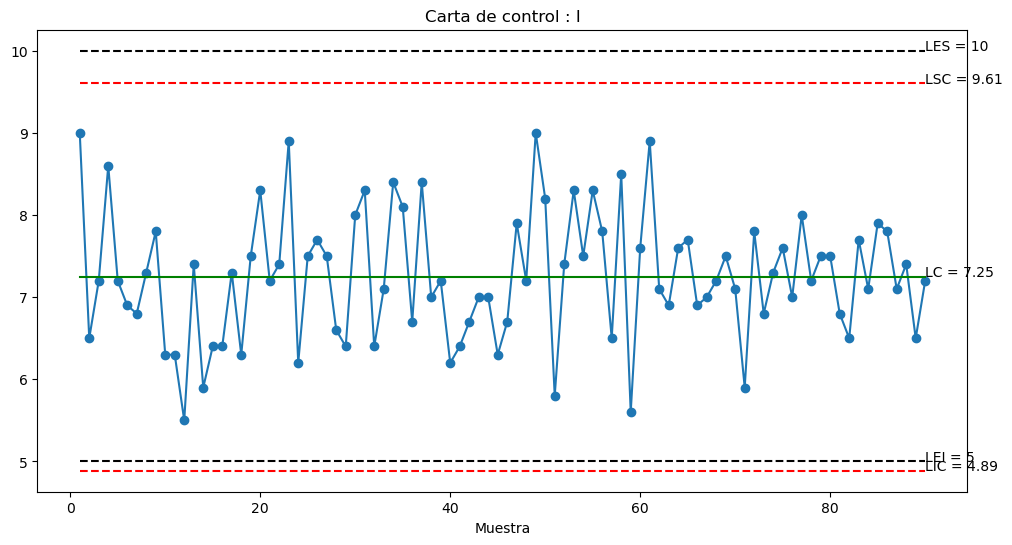

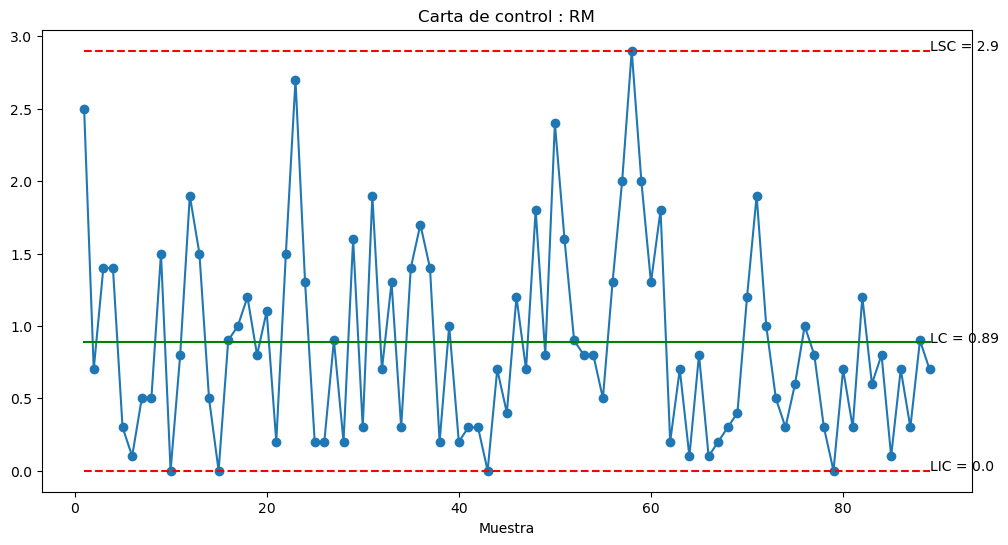

In [30]:
data_3 = pd.read_excel('Data_cp.xlsx', sheet_name = 'PLASTICO')
limites3 = get_lc(data_3, 'I')
lim_esp = [10, 5]
limites3_rm = get_lc(data_3, 'RM')
grafica_carta_esp(limites3, 'I', lim_esp)
grafica_carta(limites3_rm, 'RM')

De las cartas de control se observa que el proceso está en control y además cumple con los límites de especificación. Asimismo, se observa que el proceso está centrado. Por otro lado de la carta de rangos moviles se ve que una muestra se sale de control en la variabilidad.

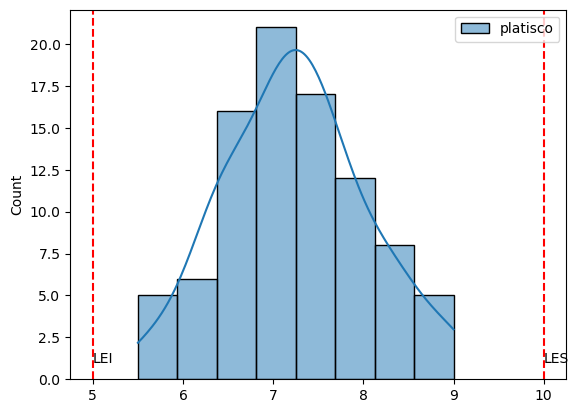

  Indice     Valor
0     Cp  1.073005
1    Cps  1.181260
2    Cpi  0.964751
3    Cpk  0.964751

--------Observaciones--------
Tipo de proceso 2 : Adecuado, pero requiere de un control estricto
El proceso está produciendo artículos fuera de las especificaciones.


In [178]:
get_hist(data_3,lim_esp)
datos3 = np.array(data_3)
mu = np.mean(datos3)
sigma = np.std(datos3)
get_indices_capacidad(lim_esp, mu, sigma)

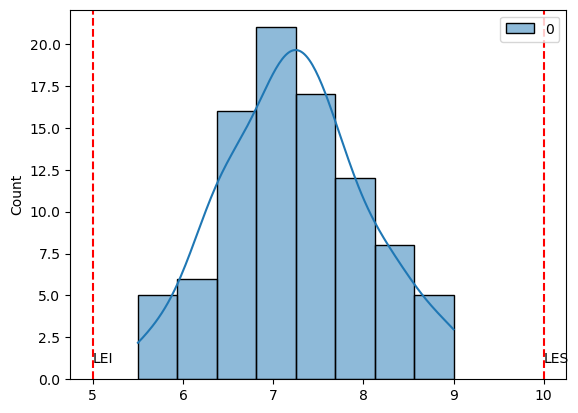

  Indice     Valor
0     Cp  1.059216
1    Cps  1.166079
2    Cpi  0.952353
3    Cpk  0.952353

--------Observaciones--------
Tipo de proceso 2 : Adecuado, pero requiere de un control estricto
El proceso está produciendo artículos fuera de las especificaciones.


In [31]:
mu = float(limites3[1])
datos3 = np.array(data_3)
#datos2 = np.array(limites2[5])
sigma = float(limites3[4])
get_hist(datos3, lim_esp)
#mu = np.mean(datos1)
#sigma = np.std(datos1)
indices = get_indices_capacidad(lim_esp, mu, sigma)
indices

A partir de los resultados obtenidos, observamos que el índice de capacidad de proceso y el índice de capacidad real son  muy cercanos, por lo que tenemos un proceso capaz y centrado. 